In [112]:
import numpy as np #operaciones matriciales y con vectores
import pandas as pd #tratamiento de datos
import matplotlib.pyplot as plt #gráficos
from sklearn import tree, datasets, metrics
from sklearn import neighbors, metrics
from matplotlib.colors import ListedColormap

import matplotlib.patches as mpatches
#from sklearn import neighbors, datasets, metrics
from sklearn.model_selection import train_test_split #metodo de particionamiento de datasets para evaluación
from sklearn.model_selection import cross_val_score, cross_validate #método para evaluar varios particionamientos de C-V
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedKFold, LeaveOneOut #Iteradores de C-V
import seaborn as sns
import math
import warnings
warnings.filterwarnings("ignore")

In [113]:
data = pd.read_csv('PF-02-DatosTelco.csv', sep=',')
print(data.shape)
data.head(5)

(23162, 9)


,ESTADO,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
0,VINCULADO,4074840,8.830000e+08,1444153.0,26,2.3,11.167542,20.3,1.762872
1,VINCULADO,8574088,1.745000e+09,2157661.0,23,3.7,0.000000,53.5,3.361266
2,RETIRADO,795993,9.500000e+07,452809.0,38,16.8,350.610224,13.9,8.359438
3,RETIRADO,8115015,8.300000e+07,2617184.0,37,17.6,230.913888,45.7,8.964017
4,RETIRADO,8187499,6.770000e+08,666069.0,19,0.0,131.541983,67.2,8.808206


In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23162 entries, 0 to 23161
Data columns (total 9 columns):
ESTADO                23162 non-null object
INGRESOS              23162 non-null int64
CASA                  23162 non-null float64
PRECIO_DISPOSITIVO    23162 non-null float64
MESES                 23162 non-null int64
DURACION              23162 non-null float64
SOBRECARGO            23162 non-null float64
SALDO_RESTANTE        23162 non-null float64
SATISFACCION          23162 non-null float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.6+ MB


In [115]:
data.describe(include="all")

,ESTADO,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
count,23162,2.316200e+04,2.316200e+04,2.316200e+04,23162.000000,23162.000000,23162.000000,23162.000000,23162.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,RETIRADO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,11665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,4.813115e+06,7.161435e+08,1.315340e+06,24.197133,9.609852,110.056296,42.991888,5.480840
std,NaN,2.737374e+06,4.811551e+08,7.485700e+05,14.264014,7.040007,100.771503,30.204540,2.809938
min,NaN,1.500000e+05,8.000000e+07,2.000000e+05,0.000000,0.000000,0.000000,0.000000,0.613580
25%,NaN,2.156296e+06,3.570000e+08,6.571840e+05,14.000000,2.100000,12.566883,15.200000,2.705504
50%,NaN,6.137553e+06,6.240000e+08,1.237456e+06,24.000000,14.600000,75.383640,37.650000,4.064550
75%,NaN,7.347180e+06,9.077500e+08,1.829581e+06,34.000000,16.100000,201.550049,70.000000,8.268244


# Busco valores duplicados

In [116]:
data[data.duplicated()]

,ESTADO,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION


# Buscamos valores nulos

In [117]:
data.isnull().values.any()

False

# Revisamos qu elos datos esten completos

In [118]:
data.count()

ESTADO                23162
INGRESOS              23162
CASA                  23162
PRECIO_DISPOSITIVO    23162
MESES                 23162
DURACION              23162
SOBRECARGO            23162
SALDO_RESTANTE        23162
SATISFACCION          23162
dtype: int64

# Buscamos valores atipicos en INGRESOS

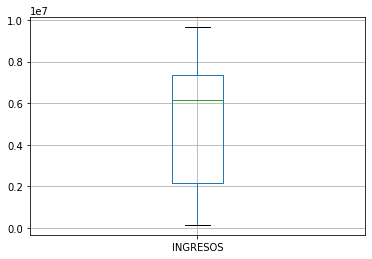

In [119]:
data.boxplot(column=['INGRESOS'])

# Buscamos valores atipicos en CASA

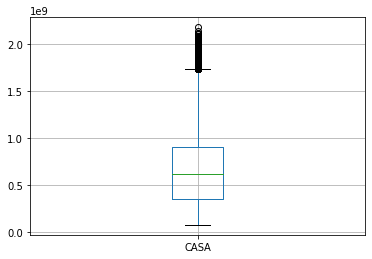

In [120]:
data.boxplot(column=['CASA'])

## Segun este boxPlot hay una gran cantidad de datos atipicos en la variable CASA

# Buscamos valores atipicos en PRECIO_DISPOSITIVO	

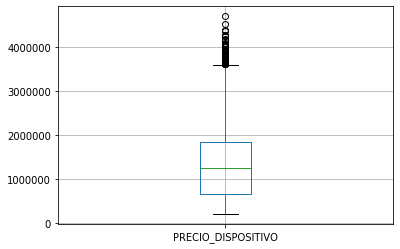

In [121]:
data.boxplot(column=['PRECIO_DISPOSITIVO'])

## Segun este boxPlot hay una gran cantidad de datos atipicos en la variable PRECIO_DISPOSITIVO

# Buscamos valores atipicos en MESES	

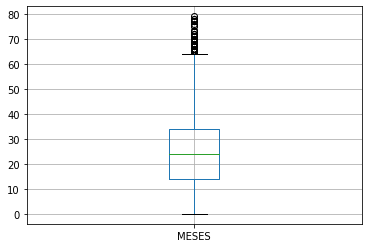

In [122]:
data.boxplot(column=['MESES'])

## Segun este boxPlot hay una gran cantidad de datos atipicos en la variable MESES

# Buscamos valores atipicos en DURACION

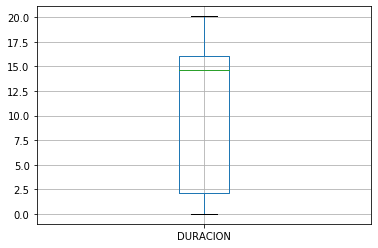

In [123]:
data.boxplot(column=['DURACION'])

# Buscamos valores atipicos en SOBRECARGO

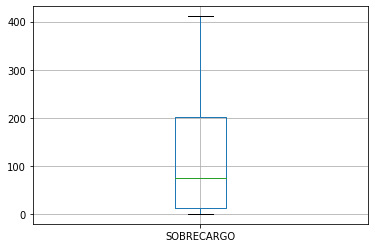

In [124]:
data.boxplot(column=['SOBRECARGO'])

# Buscamos valores atipicos en SALDO_RESTANTE

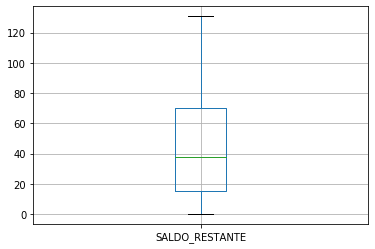

In [125]:
data.boxplot(column=['SALDO_RESTANTE'])

# Buscamos valores atipicos en SATISFACCION

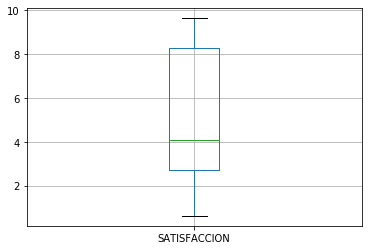

In [126]:
data.boxplot(column=['SATISFACCION'])

________________

________________

________________

# Solucion de inconsistencias en los datos


In [127]:
deletedData=data.copy()

In [128]:
print("Antes: "+str(data.shape))
def drop_numerical_outliers(data, minq=0.01,maxq=0.99):
    # Constrains will contain `True` or `False` depending on if it is a value below the threshold.
    constrains = data.select_dtypes(include=[np.number]) \
        .apply(lambda x: x.between(x.quantile(minq), x.quantile(maxq)), reduce=False) \
        .all(axis=1)
    # Drop (inplace) values set to be rejected
    data.drop(data.index[~constrains], inplace=True)
drop_numerical_outliers(data)
data
print("Despues: "+str(data.shape))

Antes: (23162, 9)
Despues: (20953, 9)


In [129]:
print("Antes: "+str(deletedData.shape))
def drop_numerical_outliers1(deletedData, minq=0.01,maxq=0.99):
    # Constrains will contain `True` or `False` depending on if it is a value below the threshold.
    constrains = deletedData.select_dtypes(include=[np.number]) \
        .apply(lambda x: x.between(x.quantile(minq), x.quantile(maxq)), reduce=False) \
        .all(axis=1)
    # Drop (inplace) values set to be rejected
    deletedData.drop(deletedData.index[constrains], inplace=True)
drop_numerical_outliers1(deletedData)
deletedData
print("Despues: "+str(deletedData.shape))

Antes: (23162, 9)
Despues: (2209, 9)


## Aqui estan los datos atipicos encontrados y separados de dataFrame original

In [130]:
deletedData

,ESTADO,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
1,VINCULADO,8574088,1.745000e+09,2157661.0,23,3.7,0.000000,53.5,3.361266
2,RETIRADO,795993,9.500000e+07,452809.0,38,16.8,350.610224,13.9,8.359438
6,RETIRADO,7256758,7.120000e+08,3493707.0,20,14.8,217.322554,69.5,8.285137
29,RETIRADO,1409067,1.105000e+09,644429.0,55,16.6,188.592668,5.8,9.027948
31,VINCULADO,7320612,1.548000e+09,284060.0,38,18.2,31.606283,92.6,2.779810
44,RETIRADO,8763522,7.940000e+08,902864.0,15,15.0,21.277878,56.6,3.330574
45,RETIRADO,4036032,5.080000e+08,2750512.0,27,2.5,224.352073,25.6,9.117037
82,VINCULADO,7319634,1.599000e+09,1259835.0,12,2.0,0.000000,72.7,1.208224
88,RETIRADO,7659140,8.540000e+08,2944507.0,37,18.4,287.722936,80.8,8.163270
100,RETIRADO,8691926,1.978000e+09,1100248.0,10,15.1,259.381896,51.1,8.289950


# 3 Tipos de modelos

# Protocolo de evalucaion HoldOut


## Vamos a utilizar el protocolo de evaluacion holdout con un 70% train y 30% test para los 3 modelos a evaluar.

In [131]:
from sklearn import preprocessing
lista= data[["SATISFACCION","INGRESOS","MESES"]].values
lista1= data[["SATISFACCION","INGRESOS","MESES"]].values
lista2= data[["SATISFACCION","INGRESOS","MESES"]].values
X_normalized = preprocessing.normalize(lista, norm='l2')
X_normalized1 = preprocessing.normalize(lista1, norm='l2')
X_normalized2 = preprocessing.normalize(lista2, norm='l2')
y=data[["ESTADO"]]
y1=data[["ESTADO"]]
y2=data[["ESTADO"]]
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3,random_state=12345)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_normalized1, y1, test_size=0.3,random_state=12345)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_normalized2, y2, test_size=0.3,random_state=12345)

# Establezca las métricas que va a utilizar, justificando su escogencia (0.2)

Para este proyecto vamos a utilizar las metricas  de <b>Kappa global</b>, <b>Accuracy</b> y la <b>Precision</b> que nos permitiran determinar el mejor modelo a seguir. En este caso el <b>Kappa global</b> determinar el mejor modelo que se encuentre por encima del baseline. El <b>Accuracy</b> nos permitira ver la cantidad de predicciones positivas que fueron correctas. Por ultimo la <b>Precision</b> nos dara una vista del porcentaje de casos positivos detectados.

In [132]:
data.head(5)

,ESTADO,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
0,VINCULADO,4074840,883000000.0,1444153.0,26,2.3,11.167542,20.3,1.762872
3,RETIRADO,8115015,83000000.0,2617184.0,37,17.6,230.913888,45.7,8.964017
4,RETIRADO,8187499,677000000.0,666069.0,19,0.0,131.541983,67.2,8.808206
5,VINCULADO,7250225,424000000.0,548116.0,19,2.2,0.000000,72.0,1.979549
7,RETIRADO,3262245,684000000.0,985708.0,32,1.3,275.595131,19.0,8.040629


# BaseLine

In [133]:
def transformar(n):
  if n=="VINCULADO" or n=="1" :
    return 1
  if n=="RETIRADO" or n=="0":
    return 0
  return n

# Vinculado =1 Retirado=0

In [134]:
data['ESTADO'] = data.applymap(transformar)['ESTADO']
data.head()

,ESTADO,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
0,1,4074840,883000000.0,1444153.0,26,2.3,11.167542,20.3,1.762872
3,0,8115015,83000000.0,2617184.0,37,17.6,230.913888,45.7,8.964017
4,0,8187499,677000000.0,666069.0,19,0.0,131.541983,67.2,8.808206
5,1,7250225,424000000.0,548116.0,19,2.2,0.000000,72.0,1.979549
7,0,3262245,684000000.0,985708.0,32,1.3,275.595131,19.0,8.040629


50.13601870853815

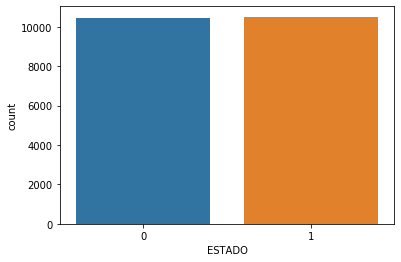

In [135]:
### Baseline
ax = sns.countplot(x="ESTADO", data=data)
data.ESTADO[data.ESTADO==1].aggregate('count') / data.shape[0] * 100

## La probabilidad de que el siguiente cliente sea vinculado, accuracy del baseLine 50.136018%

# Holdout del datset

In [136]:
data.corr(method="pearson")

,ESTADO,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
ESTADO,1.000000,-0.002640,-0.000811,0.004680,0.005914,0.003026,-0.733850,-0.003172,-0.799079
INGRESOS,-0.002640,1.000000,0.376284,-0.002491,-0.007802,-0.162776,0.000992,0.849837,0.004364
CASA,-0.000811,0.376284,1.000000,0.001979,-0.000172,-0.063783,0.003193,0.324477,0.003523
PRECIO_DISPOSITIVO,0.004680,-0.002491,0.001979,1.000000,-0.004031,0.012935,0.000949,-0.000027,-0.002261
MESES,0.005914,-0.007802,-0.000172,-0.004031,1.000000,0.007726,0.002495,-0.007470,-0.000090
DURACION,0.003026,-0.162776,-0.063783,0.012935,0.007726,1.000000,-0.001173,0.047924,-0.001634
SOBRECARGO,-0.733850,0.000992,0.003193,0.000949,0.002495,-0.001173,1.000000,0.002620,0.897264
SALDO_RESTANTE,-0.003172,0.849837,0.324477,-0.000027,-0.007470,0.047924,0.002620,1.000000,0.004455
SATISFACCION,-0.799079,0.004364,0.003523,-0.002261,-0.000090,-0.001634,0.897264,0.004455,1.000000


In [137]:
data.head()

,ESTADO,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
0,1,4074840,883000000.0,1444153.0,26,2.3,11.167542,20.3,1.762872
3,0,8115015,83000000.0,2617184.0,37,17.6,230.913888,45.7,8.964017
4,0,8187499,677000000.0,666069.0,19,0.0,131.541983,67.2,8.808206
5,1,7250225,424000000.0,548116.0,19,2.2,0.000000,72.0,1.979549
7,0,3262245,684000000.0,985708.0,32,1.3,275.595131,19.0,8.040629


In [138]:
x=data[["SOBRECARGO","SATISFACCION"]].values
y=data[["ESTADO"]].values

In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [140]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [141]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [142]:
y_pred = classifier.predict(X_test)

In [143]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1877  227]
 [ 203 1884]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      2104
           1       0.89      0.90      0.90      2087

    accuracy                           0.90      4191
   macro avg       0.90      0.90      0.90      4191
weighted avg       0.90      0.90      0.90      4191



# Holdout

In [151]:
X_normalized = preprocessing.normalize(x, norm='l2')
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3,random_state=12345)

In [152]:
k_vec= np.arange(1,15,1)
k_vec

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [163]:
error_test_vect = []
error_train_vect = []
kappa_train_vec=[]
kappa_test_vec=[]
acc_train_vec=[]
acc_test_vec=[]
Confusion_matrix_vect=[]
report_vect=[]

k_vec= np.arange(1,15,1)
for k in k_vec:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_train)
    error_train_vect.append(np.mean(y_pred != y_train))
    acc_train_vec.append(metrics.accuracy_score(y_train, y_pred))
    kappa_train_vec.append(metrics.cohen_kappa_score(y_train, y_pred))
    
    
    
    
    y_pred = knn.predict(X_test)
    acc_test_vec.append(metrics.accuracy_score(y_test, y_pred))
    error_test_vect.append(np.mean(y_pred != y_test))
    kappa_test_vec.append(metrics.cohen_kappa_score(y_test, y_pred))
    print("------------------------------------------------------------------------")
    print(k)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("------------------------------------------------------------------------")

------------------------------------------------------------------------
1
[[2164  993]
 [ 854 2275]]
              precision    recall  f1-score   support

           0       0.72      0.69      0.70      3157
           1       0.70      0.73      0.71      3129

    accuracy                           0.71      6286
   macro avg       0.71      0.71      0.71      6286
weighted avg       0.71      0.71      0.71      6286

------------------------------------------------------------------------
------------------------------------------------------------------------
2
[[2674  483]
 [1196 1933]]
              precision    recall  f1-score   support

           0       0.69      0.85      0.76      3157
           1       0.80      0.62      0.70      3129

    accuracy                           0.73      6286
   macro avg       0.75      0.73      0.73      6286
weighted avg       0.75      0.73      0.73      6286

---------------------------------------------------------------------

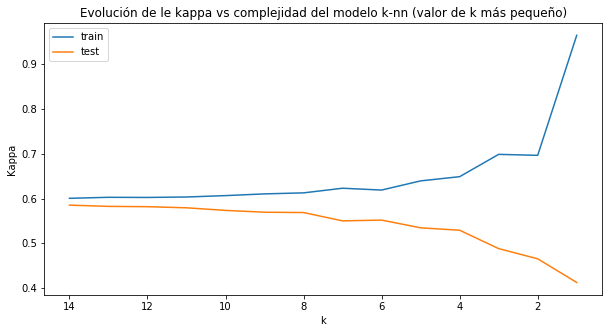

In [160]:
plt.figure(figsize=(10,5))
ax = plt.gca() # get current axis
plt.plot(k_vec, kappa_train_vec)
plt.plot(k_vec, kappa_test_vec)
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('k')
plt.ylabel('Kappa')
plt.title('Evolución de le kappa vs complejidad del modelo k-nn (valor de k más pequeño)')
plt.legend(['train', 'test'])

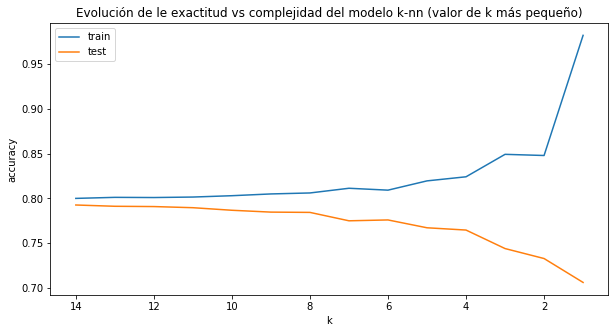

In [161]:
plt.figure(figsize=(10,5))
ax = plt.gca() # get current axis
plt.plot(k_vec, acc_train_vec)
plt.plot(k_vec, acc_test_vec)
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('Evolución de le exactitud vs complejidad del modelo k-nn (valor de k más pequeño)')
plt.legend(['train', 'test'])

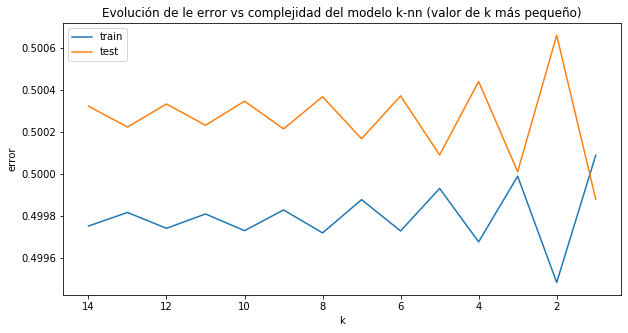

In [162]:
plt.figure(figsize=(10,5))
ax = plt.gca() # get current axis
plt.plot(k_vec, error_test_vect)
plt.plot(k_vec, error_train_vect)
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('k')
plt.ylabel('error')
plt.title('Evolución de le error vs complejidad del modelo k-nn (valor de k más pequeño)')
plt.legend(['train', 'test'])

# Modelo KNN

# Modelo Arbol de decision

# Naive-Bayes